0.05003858994029811


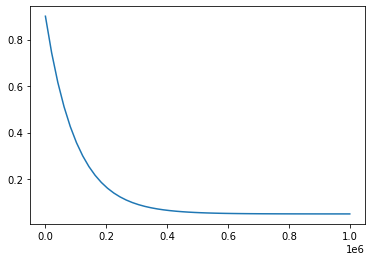

In [1]:
#from train import EPS_START, EPS_DECAY, EPS_END

GAMMA = 0.9
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 100_000
TARGET_UPDATE = 10

rows = 6
cols = 7
batch = 10_000

import matplotlib.pyplot as plt
import numpy as np

max_gen = 1000_000
x = np.linspace(0, max_gen)
y = EPS_END + (EPS_START - EPS_END) * np.exp(-1. * x / EPS_DECAY)
plt.plot(x, y)
print(y[-1])